## LANGUAGE DETECTION USING MACHINE LEARNING USING SKLEARN

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading the csv file

In [2]:
df = pd.read_csv("Language Detection.csv")

#### Viewing the sample of 5 rows for understanding of the data

In [5]:
print(df.sample(5))

                                                   Text    Language
1158  i'll be with you in a minute i'll be with you ...     English
485   [187] In a May 7, 2014, follow-up article in T...     English
4389  [27] Anderen bestrijden dat Wikipedia of iets ...       Dutch
9616  Wenn du jemandem danken willst, kannst du sage...      German
2619  Proibições totais de edição na Wikipédia são e...  Portugeese


#### Viewing the info of the csv file

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB
None


#### Total values of the each language

In [8]:
print(df['Language'].value_counts())

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64


#### Some mathmatical and statistical operations

In [9]:
df['text_length'] = df['Text'].apply(len)
print(df['text_length'].describe())

count    10337.000000
mean       124.055625
std        253.688194
min          1.000000
25%         43.000000
50%        100.000000
75%        166.000000
max      19088.000000
Name: text_length, dtype: float64


## Data Visualization

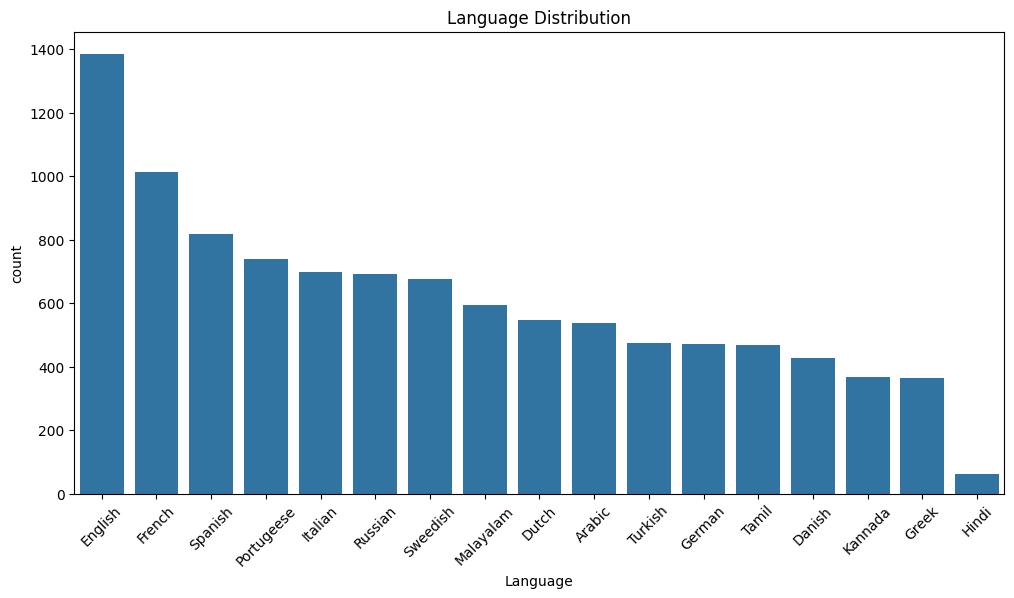

In [14]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='Language', data=df, order=df['Language'].value_counts().index)
plt.title('Language Distribution')
plt.xticks(rotation=45)
plt.show();

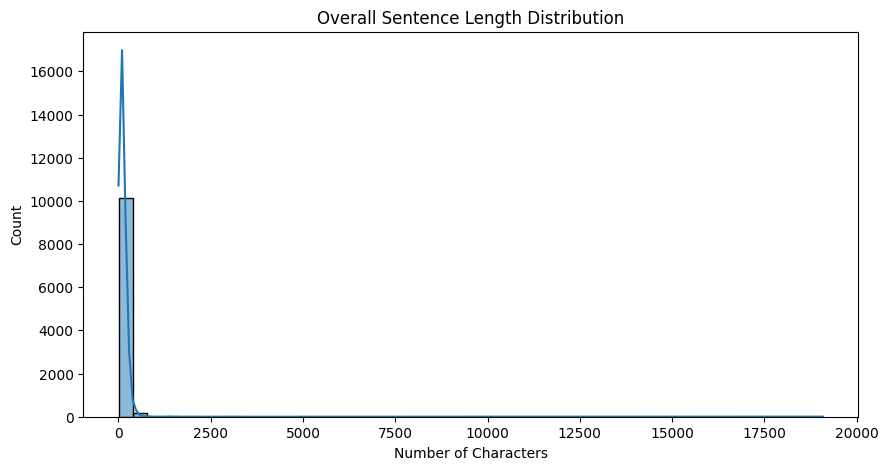

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Overall Sentence Length Distribution')
plt.xlabel('Number of Characters')
plt.show()

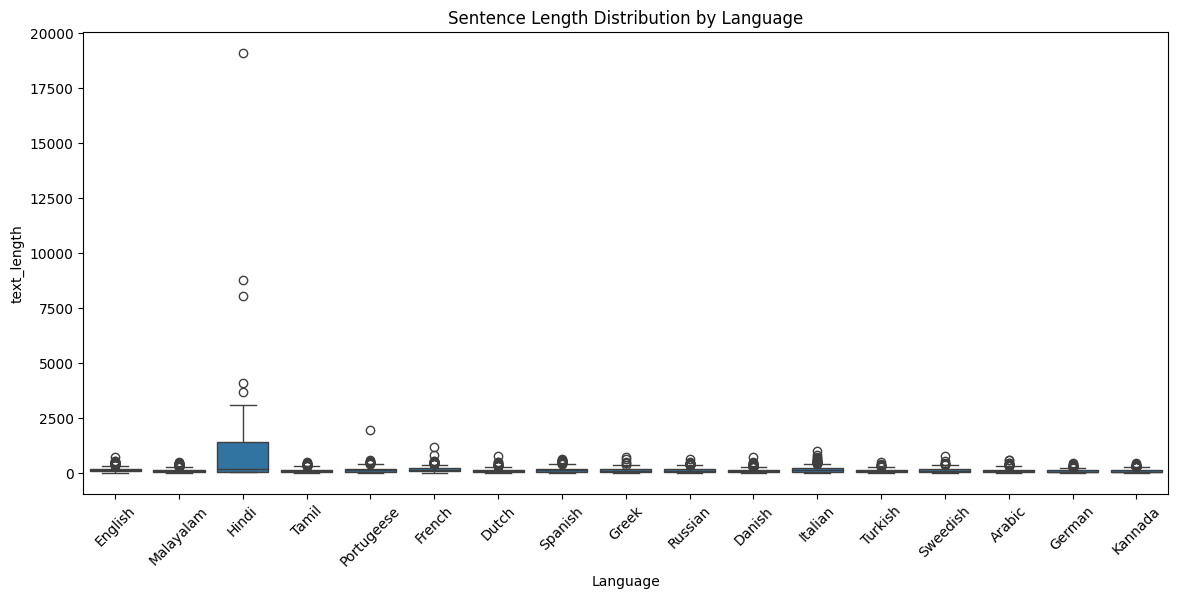

In [17]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Language', y='text_length')
plt.title('Sentence Length Distribution by Language')
plt.xticks(rotation=45)
plt.show()

 ### Data Preprocessing

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
df.dropna(inplace=True)
df = df[df['Text'].str.strip() != '']

#### Splitting of the Data to test and train the model

In [23]:
X = df['Text']
y = df['Language']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

 ### Modeling with Scikit-learn

In [24]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('model', MultinomialNB())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', MultinomialNB())])

### Evaluation

In [27]:
y_pred = pipeline.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9530947775628626

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.88      0.94       107
      Danish       1.00      0.91      0.95        86
       Dutch       1.00      0.94      0.97       109
     English       0.76      1.00      0.86       277
      French       0.98      0.99      0.98       203
      German       1.00      0.96      0.98        94
       Greek       1.00      0.92      0.96        73
       Hindi       1.00      0.67      0.80        12
     Italian       1.00      0.98      0.99       140
     Kannada       1.00      0.89      0.94        74
   Malayalam       1.00      0.97      0.99       119
  Portugeese       1.00      0.97      0.98       148
     Russian       1.00      0.96      0.98       138
     Spanish       0.99      0.97      0.98       164
    Sweedish       0.98      0.98      0.98       135
       Tamil       1.00      0.98      0.99        94
     Turkish       1.00   

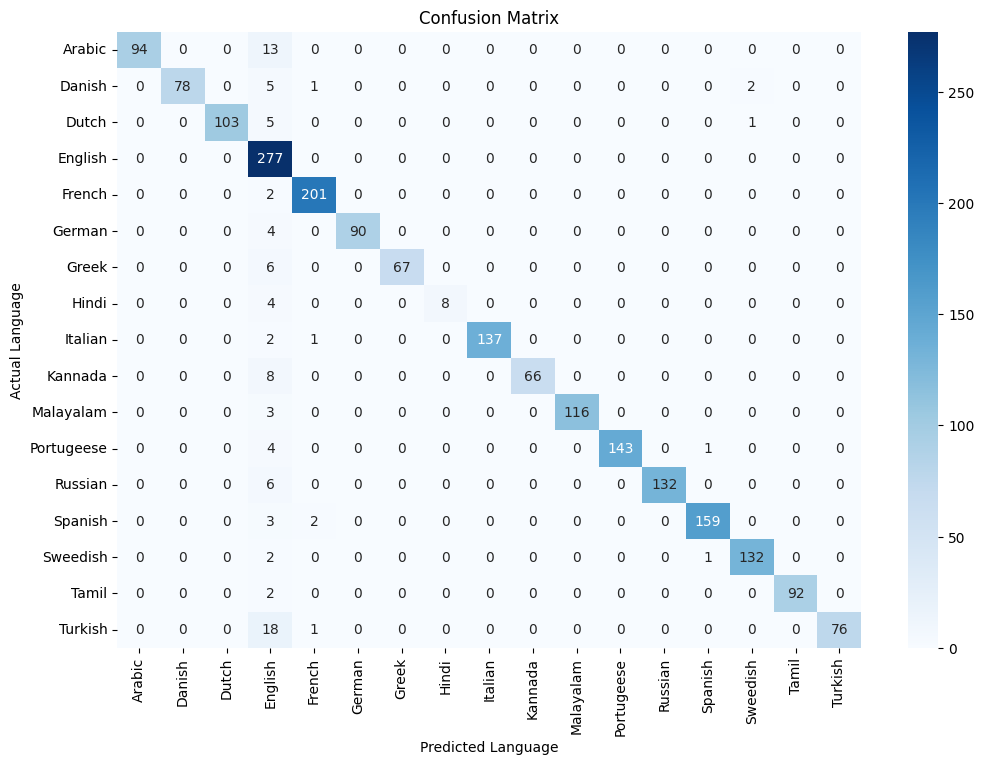

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(df['Language'].unique()), 
            yticklabels=sorted(df['Language'].unique()))
plt.title('Confusion Matrix')
plt.ylabel('Actual Language')
plt.xlabel('Predicted Language')
plt.show()

 ### End-to-End Prediction

In [29]:
def detect_language(text):
    return pipeline.predict([text])[0]

print("\nExamples:")
print("Sentence: Bonjour tout le monde =>", detect_language("Bonjour tout le monde"))
print("Sentence: यह एक परीक्षण वाक्य है =>", detect_language("यह एक परीक्षण वाक्य है"))



Examples:
Sentence: Bonjour tout le monde => French
Sentence: यह एक परीक्षण वाक्य है => English


In [30]:
import joblib
joblib.dump(pipeline, 'language_detector.pkl')

['language_detector.pkl']

## PROJECT SUMMARY:
This project successfully demonstrates a language detection model using only scikit-learn tools.
Key components include:
- Exploratory Data Analysis and Visualizations
- Preprocessing with Tfidf
- Naive Bayes Classification
- Evaluation with Accuracy and Confusion Matrix
- A function for real-time language prediction
- Saving the trained model for deployment